In [4]:
#BreatCancer_Project

In [5]:
#importing required libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [6]:
df = pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
#checking the null values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [11]:
#Replacing M and B in diagnosis column as 0 and 1 respectively
df['diagnosis'] = df['diagnosis'].replace({'M': 0, 'B': 1})
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
df['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

In [13]:
df.drop(columns=['id'],inplace=True)

In [14]:
#Converting all the data into Float datatype
df = df.astype(float)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0.0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0.0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0.0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Text(0.5, 1.0, 'Correlation Heatmap for Different Features')

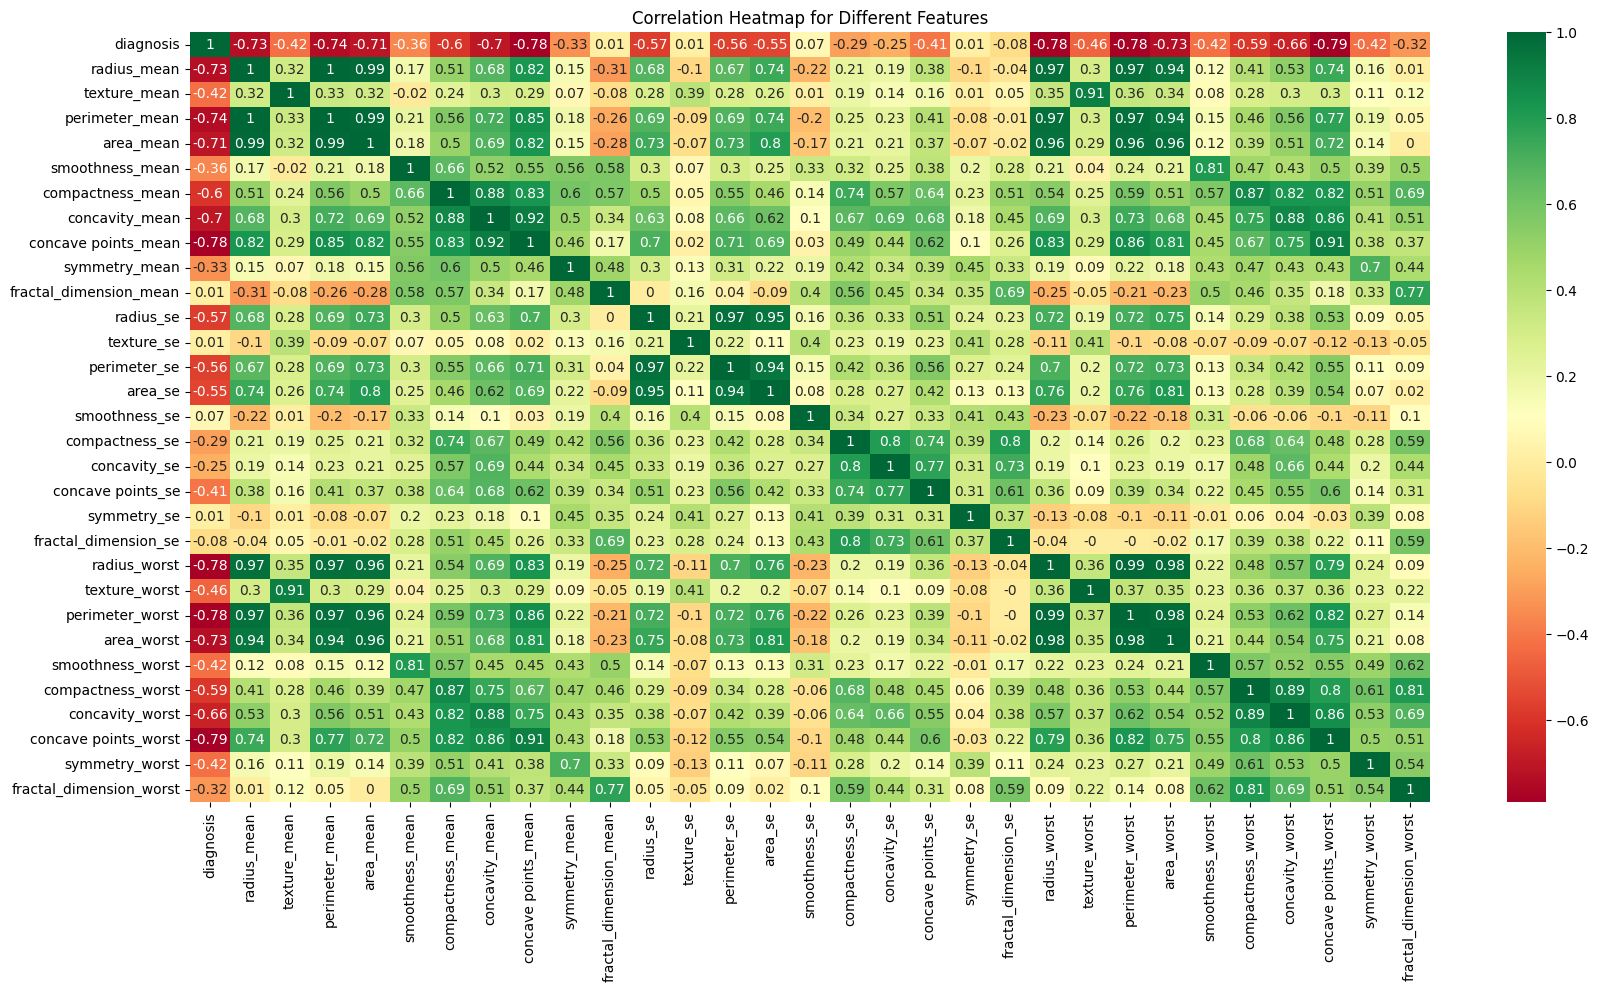

In [15]:
#heat map for plotting the correlation between all the columns
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(round(corr,2), annot=True, cmap='RdYlGn')
plt.title('Correlation Heatmap for Different Features')

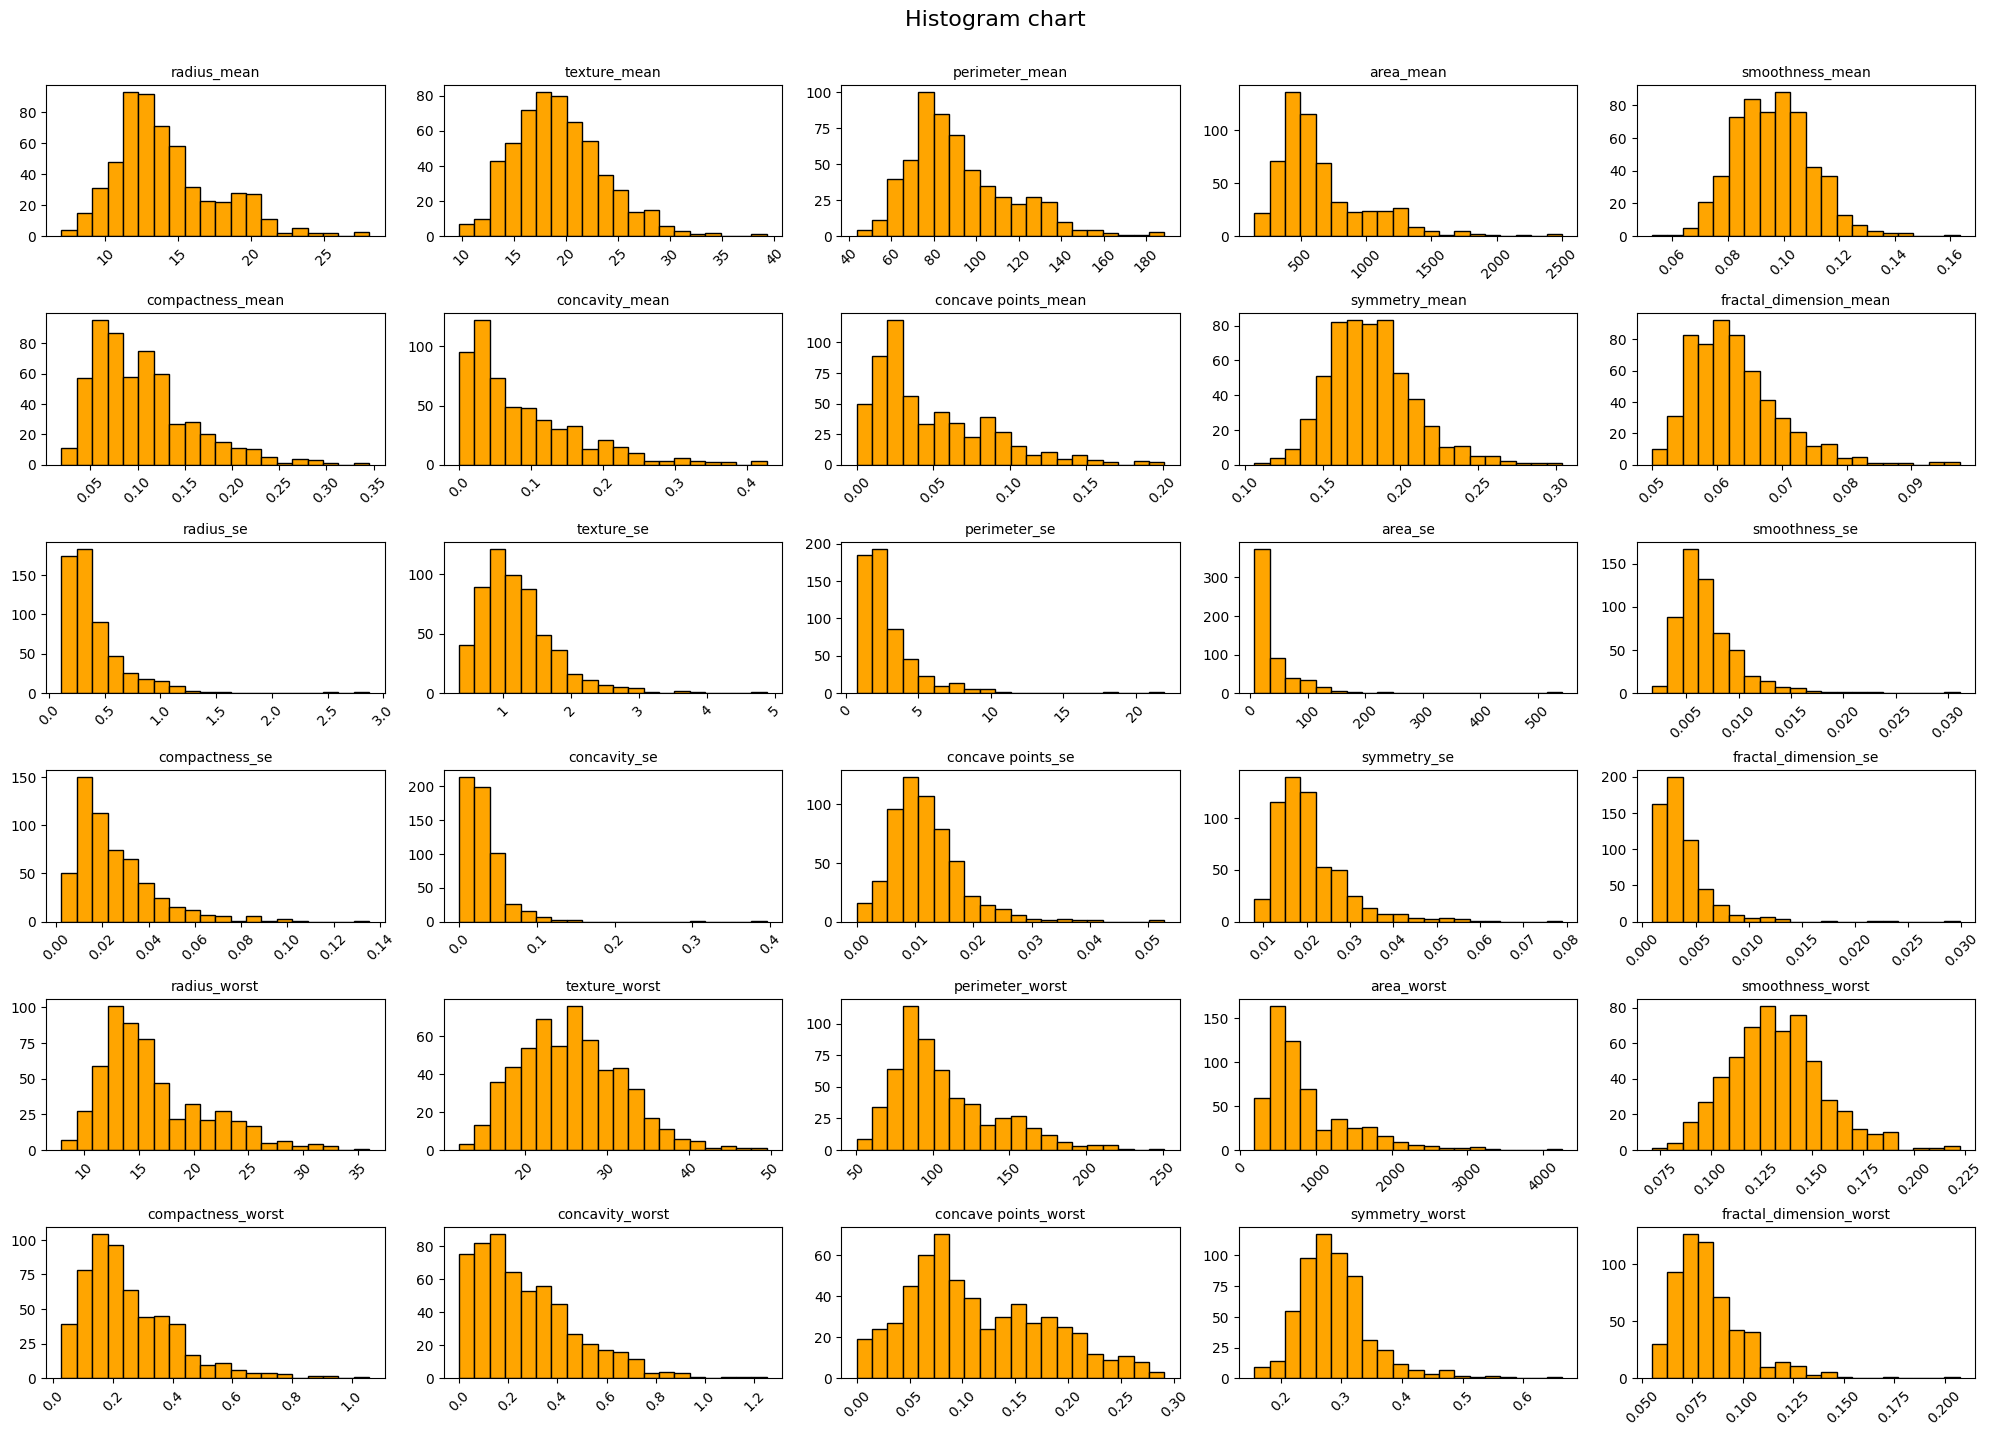

In [16]:
#histogram chart
cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
        'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
        'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
        'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
        'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
        'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
        'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(20, 15))
fig.suptitle('Histogram chart', fontsize=16, y=0.95)

for ax, col in zip(axs.flat, cols):
    ax.hist(df[col], bins=20, edgecolor='black', color='orange')
    ax.set_title(col, fontsize=10)
    ax.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [17]:
#feature scaling
scaler = StandardScaler() 

cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
        'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
        'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
        'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
        'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
        'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
        'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
df[cols] = scaler.fit_transform(df[cols])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,0.0,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.0,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.0,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,0.0,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.0,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,0.0,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.0,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,0.0,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [18]:
#split data into train and test

x = df.drop(['diagnosis'],axis=1)
y = df['diagnosis']

feature_names = x.columns.tolist()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

## Logistics Regression

Execution time: 0.03 seconds

Accuracy Score:
0.9824561403508771

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98        63
         1.0       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



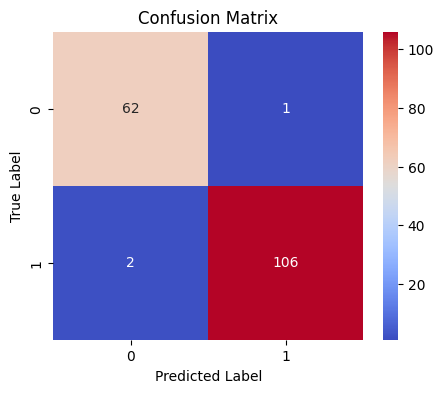


Training Set Evaluation:

Accuracy Score:
0.9874371859296482

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       149
         1.0       0.98      1.00      0.99       249

    accuracy                           0.99       398
   macro avg       0.99      0.98      0.99       398
weighted avg       0.99      0.99      0.99       398



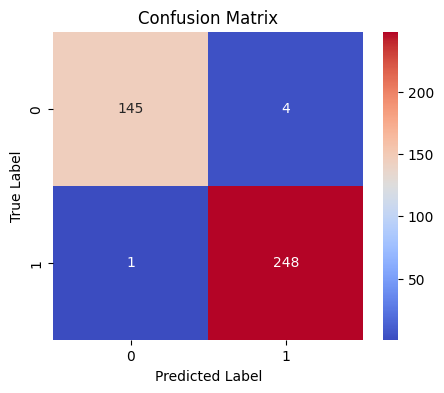

In [19]:
logistic = LogisticRegression(solver='newton-cg', max_iter=2000)

start_time=time.time()

# Fit the model to the training data
logistic.fit(x_train, y_train)

end_time=time.time()

# Predict on the test data
y_pred = logistic.predict(x_test)
# Predict on the train data
y_pred_train = logistic.predict(x_train)

execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=True, xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print evaluation metrics for the training set
print("\nTraining Set Evaluation:")

print("\nAccuracy Score:")
print(accuracy_score(y_train, y_pred_train))
print("\nClassification Report:")
print(classification_report(y_train, y_pred_train))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_train)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=True, xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## K-fold cross validation

In [20]:
# Define the K-fold cross-validator
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kfold.split(x, y), 1):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    logistic.fit(x_train, y_train)
    y_pred = logistic.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate classification report
    report = classification_report(y_test, y_pred)
    
    print(f"Fold {fold} - Accuracy: {accuracy}")
    print(f"Fold {fold} - Classification Report:\n{report}\n")

Fold 1 - Accuracy: 0.9736842105263158
Fold 1 - Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97        43
         1.0       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Fold 2 - Accuracy: 0.9473684210526315
Fold 2 - Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.93        43
         1.0       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114


Fold 3 - Accuracy: 0.9649122807017544
Fold 3 - Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        42
         1.0       0.95  

## Gaussian Naive Bayes

Execution time: 0.01 seconds

Accuracy Score:
0.9469026548672567

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93        42
         1.0       0.95      0.97      0.96        71

    accuracy                           0.95       113
   macro avg       0.95      0.94      0.94       113
weighted avg       0.95      0.95      0.95       113



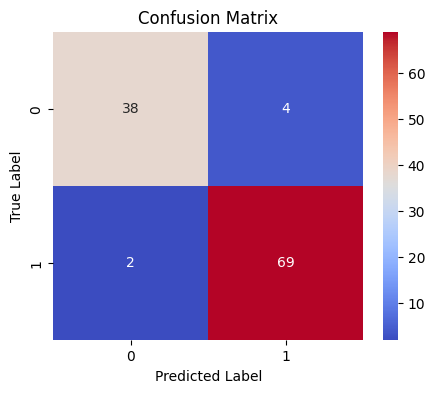


Training Set Evaluation:

Accuracy Score:
0.9364035087719298

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91       170
         1.0       0.94      0.96      0.95       286

    accuracy                           0.94       456
   macro avg       0.94      0.93      0.93       456
weighted avg       0.94      0.94      0.94       456



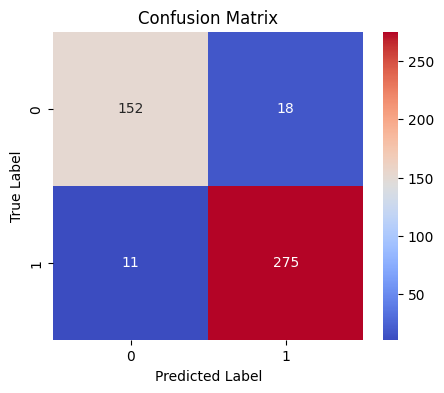

In [21]:
GNB = GaussianNB()

start_time=time.time()

# Fit the model to the training data
GNB.fit(x_train, y_train)

end_time=time.time()

# Predict on the test data
y_pred = GNB.predict(x_test)
# Predict on the train data
y_pred_train = GNB.predict(x_train)

execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=True, xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print evaluation metrics for the training set
print("\nTraining Set Evaluation:")

print("\nAccuracy Score:")
print(accuracy_score(y_train, y_pred_train))
print("\nClassification Report:")
print(classification_report(y_train, y_pred_train))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_train)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=True, xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



## K-fold cross validation

In [22]:
# Define the K-fold cross-validator
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kfold.split(x, y), 1):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    GNB.fit(x_train, y_train)
    y_pred = GNB.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate classification report
    report = classification_report(y_test, y_pred)
    
    print(f"Fold {fold} - Accuracy: {accuracy}")
    print(f"Fold {fold} - Classification Report:\n{report}\n")

Fold 1 - Accuracy: 0.956140350877193
Fold 1 - Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94        43
         1.0       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Fold 2 - Accuracy: 0.9122807017543859
Fold 2 - Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.84      0.88        43
         1.0       0.91      0.96      0.93        71

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114


Fold 3 - Accuracy: 0.9298245614035088
Fold 3 - Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.83      0.90        42
         1.0       0.91   

## SVM with Kernel

Execution time: 0.01 seconds

Accuracy Score:
0.9911504424778761

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        42
         1.0       0.99      1.00      0.99        71

    accuracy                           0.99       113
   macro avg       0.99      0.99      0.99       113
weighted avg       0.99      0.99      0.99       113



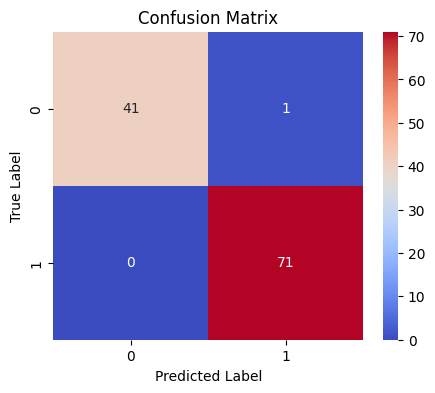


Training Set Evaluation:

Accuracy Score:
0.9912280701754386

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       170
         1.0       0.99      1.00      0.99       286

    accuracy                           0.99       456
   macro avg       0.99      0.99      0.99       456
weighted avg       0.99      0.99      0.99       456



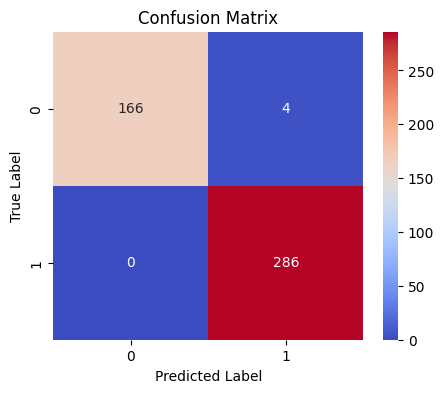

In [23]:
SVM = SVC(kernel='linear', C=2)

start_time=time.time()

# Fit the model to the training data
SVM.fit(x_train, y_train)

end_time=time.time()

# Predict on the test data
y_pred = SVM.predict(x_test)
# Predict on the train data
y_pred_train = SVM.predict(x_train)

execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=True, xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print evaluation metrics for the training set
print("\nTraining Set Evaluation:")

print("\nAccuracy Score:")
print(accuracy_score(y_train, y_pred_train))
print("\nClassification Report:")
print(classification_report(y_train, y_pred_train))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_train)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=True, xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## K-fold cross validation

In [24]:
# Define the K-fold cross-validator
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kfold.split(x, y), 1):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    SVM.fit(x_train, y_train)
    y_pred = SVM.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate classification report
    report = classification_report(y_test, y_pred)
    
    print(f"Fold {fold} - Accuracy: {accuracy}")
    print(f"Fold {fold} - Classification Report:\n{report}\n")

Fold 1 - Accuracy: 0.9824561403508771
Fold 1 - Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        43
         1.0       1.00      0.97      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114


Fold 2 - Accuracy: 0.9473684210526315
Fold 2 - Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93        43
         1.0       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Fold 3 - Accuracy: 0.956140350877193
Fold 3 - Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.90      0.94        42
         1.0       0.95   